# Python - Advanced

An introduction to using Python within your research. In this section we'll cover some very brief examples of reading, writing, analysing and visualising data. The exercises will then allow you to explore this further with more hands on examples.

## Quick Recap

A quick recap of Python from the beginners course, just in case:

We can store data values in variables. These could be numbers, strings, true or false values and so on

In [1]:
x = 12
x = x - 5
print(x)

7


In [2]:
a = "the bees"
length_a = len(a)
print(length_a)

8


We can store values in lists, then access specific parts of the list using indexes:

In [3]:
x = [3, 5, 7, 9]
print(x[2])

7


Lists can store values of multiple types:

In [4]:
x.append("bee")
print(x)

[3, 5, 7, 9, 'bee']


We can iterate through lists using a for loop:

In [5]:
for i in x:
    print(i)

3
5
7
9
bee


We can make decisions in our code using if/elif/else statements:

In [6]:
x = 100

if x > 100:
    print("x is greater than 100")
elif x < 100:
    print("x is less than 100")
else:
    print("x is exactly 100")

x is exactly 100


We can store items in dictionaries ('dicts') as key/value pairs:

In [7]:
a = {"bears": 5, "cows": 22, "giraffes": 12, "lemurs": 445}

Then we can access the items by key:

In [8]:
print(a["bears"])

5


Or we can iterate over the whole dictionary:

In [9]:
for key, value in a.items():
    print(key, value)

cows 22
lemurs 445
giraffes 12
bears 5


We can expand Python's functionality by importing extra modules:

In [10]:
import math

x = 34
print(math.sin(x))

0.5290826861200238


## Reading and Writing Data

We can open files for reading and writing using the `open()` function

In [11]:
out_file = open("output.txt", "w")
out_file.write("test")
out_file.close()

The `"w"` tells Python we want to open the file for writing to. If the file does not exist already, Python will create it. If we open a file with an `"r"` we are telling Python we just want to *read* the file.

In [12]:
in_file = open("leagueone.txt", "r")
lines = in_file.readlines()
for line in lines:
    print(line)

Wolverhampton Wanderers

Brentford

Rotherham United

Leyton Orient

Preston North End

Peterborough United

MK Dons

Swindon Town

Port Vale

Walsall

Sheffield United

Bradford City

Coventry City

Gillingham

Bristol City

Oldham Athletic

Crawley Town

Colchester United

Tranmere Rovers

Carlisle

Crewe Alexandra

Shrewsbury Town

Notts County

Stevenage


The `csv` module is useful for reading and writing data to csv files:

In [13]:
import csv

in_file = open("DigitalBreathTestData2011.csv", "r")
reader = csv.reader(in_file)

header = next(reader)
print(header)

['Reason', 'Month', 'Year', 'WeekType', 'TimeBand', 'BreathAlcoholLevel(microg/100ml)', 'AgeBand', 'Gender']


In [14]:
alcohol_level = []

for row in reader:
    alcohol_level.append(row[5])
    
print(alcohol_level[0:10])
    

['14', '0', '0', '0', '71', '0', '91', '0', '32', '0']


`csv` also provides a `DictReader`/`DictWriter`, which is especially helpful when our csv file has column headings, as in this case

In [15]:
import csv

in_file = open("DigitalBreathTestData2011.csv", "r")

reader = csv.DictReader(in_file)

print(reader.fieldnames)

alcohol_level = []

for row in reader:
    alcohol_level.append(row['BreathAlcoholLevel(microg/100ml)'])
    
print(alcohol_level[0:10])

['Reason', 'Month', 'Year', 'WeekType', 'TimeBand', 'BreathAlcoholLevel(microg/100ml)', 'AgeBand', 'Gender']
['14', '0', '0', '0', '71', '0', '91', '0', '32', '0']


In [16]:
header = ["bears", "bees", "bricks"]

sample_a = {"bears": 20, "bees": 5, "bricks": 456}
sample_b = {"bears": 10, "bees": 8, "bricks": 123}
sample_c = {"bears": 30, "bees": 9, "bricks": 789}

out_file = open("test_output.csv", "w")

writer = csv.DictWriter(out_file, header)
writer.writeheader()
writer.writerows([sample_a, sample_b, sample_c])

out_file.close()

## Pandas module

However, `csv` isn't that great as it forces us to examine our data one row at a time, when in general we'd like to see all of our data at the same time. The `pandas` module provides better data structures and analysis tools for dealing with data in Python. For more information on `pandas`, see the pandas website at http://pandas.pydata.org/

For example, to read all of our data into a `pandas` `DataFrame`:

In [17]:
import pandas

data = pandas.read_csv("DigitalBreathTestData2011.csv")

Now we can access all the data in a column of our csv file really easily:

In [18]:
print(data['BreathAlcoholLevel(microg/100ml)'][0:10])

0    14
1     0
2     0
3     0
4    71
5     0
6    91
7     0
8    32
9     0
Name: BreathAlcoholLevel(microg/100ml), dtype: int64


`pandas` has some helpful methods to let us examine our data initially:

In [19]:
print(data.head())

                     Reason Month  Year WeekType  TimeBand  \
0      Suspicion of Alcohol   Nov  2011  Weekend  12am-4am   
1  Moving Traffic Violation   Nov  2011  Weekend  8pm-12pm   
2  Moving Traffic Violation   Nov  2011  Weekend  12am-4am   
3  Moving Traffic Violation   Nov  2011  Weekend  8pm-12pm   
4  Moving Traffic Violation   Nov  2011  Weekday  8am-12pm   

   BreathAlcoholLevel(microg/100ml) AgeBand  Gender  
0                                14   25-29    Male  
1                                 0   20-24    Male  
2                                 0   25-29    Male  
3                                 0   50-59    Male  
4                                71   40-49  Female  


In [20]:
print(data.describe())

         Year  BreathAlcoholLevel(microg/100ml)
count  559230                     559230.000000
mean     2011                          9.763078
std         0                         28.484986
min      2011                          0.000000
25%      2011                          0.000000
50%      2011                          0.000000
75%      2011                          0.000000
max      2011                       6551.000000


There are also helpful methods for things like sorting data:

In [22]:
sorted_data = data.sort_values(by="BreathAlcoholLevel(microg/100ml)", ascending=False)

print(sorted_data.head(10))

                          Reason Month  Year WeekType  TimeBand  \
164534      Suspicion of Alcohol   Oct  2011  Weekend  8pm-12pm   
157053      Suspicion of Alcohol   Oct  2011  Weekend  8am-12pm   
494497      Suspicion of Alcohol   Jan  2011  Weekday  12pm-4pm   
257531      Suspicion of Alcohol   Jun  2011  Weekend   4pm-8pm   
395251      Suspicion of Alcohol   Dec  2011  Weekday  12am-4am   
172942      Suspicion of Alcohol   Jul  2011  Weekend  12am-4am   
425723  Moving Traffic Violation   Apr  2011  Weekday  8pm-12pm   
436399      Suspicion of Alcohol   Jul  2011  Weekend  12am-4am   
303335    Road Traffic Collision   May  2011  Weekday  12am-4am   
527189  Moving Traffic Violation   May  2011  Weekday  12am-4am   

        BreathAlcoholLevel(microg/100ml) AgeBand   Gender  
164534                              6551   20-24     Male  
157053                              6544   25-29  Unknown  
494497                               503   25-29   Female  
257531                

If we are only interested in certain columns, we can select those:

In [23]:
month_alcohol = data.loc[:, ['Month', 'BreathAlcoholLevel(microg/100ml)']]

print(month_alcohol.head())

  Month  BreathAlcoholLevel(microg/100ml)
0   Nov                                14
1   Nov                                 0
2   Nov                                 0
3   Nov                                 0
4   Nov                                71


We can group results together and then perform operations on that data:

In [24]:
group_by_month = month_alcohol.groupby('Month')

print(group_by_month.mean())

       BreathAlcoholLevel(microg/100ml)
Month                                  
Apr                           13.635647
Aug                           12.864574
Dec                            4.689709
Feb                           11.422124
Jan                           10.338411
Jul                           12.202678
Jun                            6.291609
Mar                           12.226393
May                           13.233712
Nov                           11.192367
Oct                           12.968526
Sep                           12.711301


Of course, we could do this from the initial data too:

In [25]:
print(data.groupby('Month')['BreathAlcoholLevel(microg/100ml)'].mean())

Month
Apr    13.635647
Aug    12.864574
Dec     4.689709
Feb    11.422124
Jan    10.338411
Jul    12.202678
Jun     6.291609
Mar    12.226393
May    13.233712
Nov    11.192367
Oct    12.968526
Sep    12.711301
Name: BreathAlcoholLevel(microg/100ml), dtype: float64


`pandas` has lots more useful tools for manipulating, selecting and transforming data. The documentation is fairly comprehensive. It also has tools for basic plotting. For more advanced plotting, you'll want to use `matplotlib`, which we'll talk about later.

 
 
 
## Statistics

The Python module `scipy` and contains many methods for analysis of data. We'll cover just a few methods from the `scipy.stats` module here. For more, look at the documentation online at http://www.scipy.org/scipylib/index.html

In [26]:
import scipy
import numpy

data_a = numpy.random.rand(100)
data_b = numpy.random.rand(100)

print(data_a[0:10])
print(data_b[0:10])


[ 0.64483055  0.70212479  0.98902624  0.38065805  0.71908089  0.97224741
  0.09738798  0.25063652  0.79395672  0.01063288]
[ 0.82792875  0.60677523  0.39174119  0.47385288  0.1022468   0.92250011
  0.35206152  0.90228785  0.30712613  0.38153988]


In [27]:
print("mean: %f, std: %f" % (scipy.mean(data_a), scipy.std(data_a)))
print("mean: %f, std: %f" % (scipy.mean(data_b), scipy.std(data_b)))

mean: 0.514357, std: 0.310292
mean: 0.487801, std: 0.297894


We could perform a t-test on our data to check if there's a significant difference between the means:

In [28]:
from scipy import stats

t, p_val = stats.ttest_ind(data_a, data_b)
print("t: %f, p: %f" % (t, p_val))

t: 0.614275, p: 0.539739


We could look for a correlation between our two datasets:

In [29]:
r, p_val = stats.pearsonr(data_a, data_b)
print("r: %f, p: %f" % (r, p_val))

r: -0.055119, p: 0.585977


What statistical analysis we want to do on our data is obviously dependent on the data itself and the field we are working in, but in general, `scipy` should have the method/analysis you need




# Visualising Data

We'll now look at visualising our data using `matplotlib`. For more information on `matplotlib`, check out the documentation online at http://matplotlib.org/

First of all we create some random data to plot:

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

data = np.random.rand(100)
print(data)


[ 0.01168632  0.46266531  0.58686666  0.0097285   0.37670011  0.6939651
  0.47473258  0.49046731  0.75271265  0.86085171  0.15614608  0.24076324
  0.85351362  0.90304632  0.6053064   0.61022157  0.31731699  0.44041168
  0.32030124  0.48347094  0.79231221  0.00381604  0.22355064  0.7022101
  0.03424507  0.37658107  0.63118357  0.63710749  0.44751571  0.84834455
  0.00435005  0.26948043  0.41572446  0.95769408  0.07100022  0.50568834
  0.96732104  0.45279484  0.74568619  0.68584222  0.17343878  0.22463792
  0.39033049  0.45520108  0.31127569  0.0458956   0.86214375  0.73469516
  0.89256747  0.87250548  0.30162073  0.8237987   0.43295762  0.90369796
  0.18959184  0.73175222  0.79284171  0.71692921  0.19052087  0.09958381
  0.3909591   0.08476747  0.00279715  0.45967711  0.46408561  0.76151217
  0.6351608   0.43121888  0.85820117  0.2681342   0.01116446  0.20207403
  0.79057581  0.9239362   0.63286195  0.51780029  0.8619591   0.70862297
  0.00716857  0.28901281  0.14174693  0.05508619  0.1

Now, we need some index values to plot this data against, so we make a list containing the values `0 ... 99`

In [2]:
x = np.arange(100)
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


Now we can ask matplotlib to plot this data as a simple scatter plot:

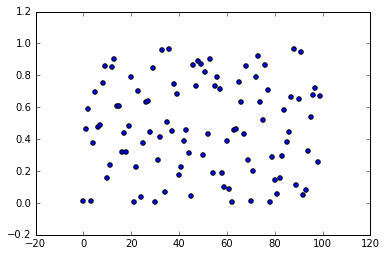

In [3]:
fig = plt.figure()
plt.scatter(x, data)
plt.show()

The exercises cover more examples of visualising data using `matplotlib`